<h1>Imports</h1>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1>Creating training dataset</h1>

In [18]:
path = "D:/CIPHER/Scikit and PyTorch/Datasets/iris.data"
data = pd.read_csv(path, header=None)

<h1>Simplifying the data for binary classifcation</h1>

In [19]:
#features : extracting 2 out of 4 features that will be used for training
x = data.iloc[0:100,[0,2]].values
#target : sentosa or versicolor
y = data.iloc[:100, 4].values
y = np.where(y=='Iris-setosa',0,1)

<h1>Visualizing data</h1>

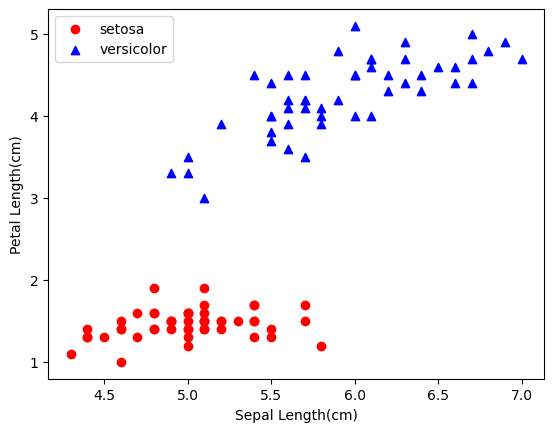

In [20]:
plt.scatter(x[:50,0], x[:50,1], color='red', marker='o', label='setosa')
plt.scatter(x[50:,0], x[50:,1], color='blue', marker='^', label='versicolor')
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Petal Length(cm)")
plt.legend(loc="upper left")
plt.show()

<h1>Perceptron model</h1>

In [21]:
class Perceptron:
    def __init__(self, etta, n_iter):
        self.etta = etta
        self.n_iter = n_iter
        self.iter_error = np.int64(0)
        self.total_error = np.zeros((n_iter,), dtype=int)
        
    def fit(self, x, y):
        self.weights = np.random.normal(loc=0.0, scale=0.01, size=x.shape[1])
        self.bias = np.float64(0.0)

        for i in range(self.n_iter):
            for feature,target in zip(x,y):
                prediction = self.predict_output(feature)
                self.optimizer(prediction, target, feature)
            self.total_error[i] = self.iter_error
            self.iter_error = np.int64(0)

    def predict_output(self, feature):
        if self.weights.dot(feature) + self.bias > 0:
            return 1
        else :
            return 0

    def optimizer(self, prediction, target, feature):
        if prediction!= target:
            self.iter_error += 1
            #print(self.weights.shape[0])
            for j in range(self.weights.shape[0]):   
                self.weights[j] += self.etta*(target - prediction)*feature[j] 
            self.bias += self.etta*(target - prediction)

<h1>Training the model</h1>

In [22]:
ppn = Perceptron(etta=0.1, n_iter=10)
ppn.fit(x,y)

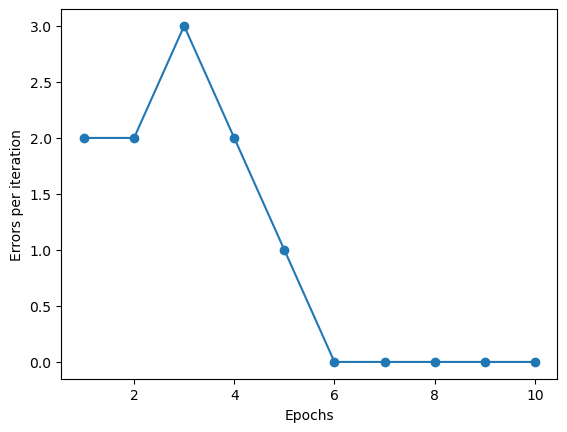

In [23]:
plt.plot(range(1, len(ppn.total_error) + 1), ppn.total_error, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors per iteration')
plt.show()